In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [44]:
import pandas as pd

column_list = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_df = pd.read_table("abalone.data",sep=",",header=None,names=column_list)



In [45]:
abalone_df = pd.get_dummies(abalone_df)
abalone_df.head()
abalone_df = abalone_df[abalone_df.Height != 0]
abalone_df['Rings'].value_counts().sort_index()
abalone_df = abalone_df[(abalone_df['Rings'] < 21) & (abalone_df['Rings']>3)]
abalone_df.info()
out_abalone=abalone_df.copy()
Q1 = out_abalone.quantile(0.25)
Q3 = out_abalone.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
abalone_df = out_abalone[~((out_abalone < (Q1 - 2.5 * IQR)) |(out_abalone > (Q3 + 2.5 * IQR))).any(axis=1)]
abalone_df.shape
from sklearn import preprocessing
X = abalone_df.drop(['Rings'], axis=1)
y = abalone_df['Rings']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 27)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X, y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4122 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4122 non-null   float64
 1   Diameter        4122 non-null   float64
 2   Height          4122 non-null   float64
 3   Whole weight    4122 non-null   float64
 4   Shucked weight  4122 non-null   float64
 5   Viscera weight  4122 non-null   float64
 6   Shell weight    4122 non-null   float64
 7   Rings           4122 non-null   int64  
 8   Sex_F           4122 non-null   uint8  
 9   Sex_I           4122 non-null   uint8  
 10  Sex_M           4122 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 301.9 KB
Length            0.165000
Diameter          0.130000
Height            0.050000
Whole weight      0.706875
Shucked weight    0.315750
Viscera weight    0.159000
Shell weight      0.195000
Rings             3.000000
Sex_F             1.000000
Sex

array([[-0.57816635, -0.43195836, -1.16192728, ..., -0.66948808,
        -0.69510779,  1.31974141],
       [-1.46684626, -1.45682005, -1.29490355, ..., -0.66948808,
        -0.69510779,  1.31974141],
       [ 0.05660501,  0.13171558, -0.09811714, ...,  1.49367858,
        -0.69510779, -0.7577242 ],
       ...,
       [ 0.64905828,  0.69538951,  1.76355062, ..., -0.66948808,
        -0.69510779,  1.31974141],
       [ 0.86064874,  0.79787568,  0.30081167, ...,  1.49367858,
        -0.69510779, -0.7577242 ],
       [ 1.58005628,  1.51527887,  1.49759808, ..., -0.66948808,
        -0.69510779,  1.31974141]])

In [46]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping


# Specify the model
n_cols = X.shape[1]
model = Sequential()
model.add(Dense(300, activation='relu', input_shape = (n_cols,)))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

early_stopping_monitor = EarlyStopping(patience = 3)



#model.summary()
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mean_squared_error'])


#model.fit(X_train, y_train,  validation_split = .3, epochs = 30, batch_size=100,verbose=1,callbacks = [early_stopping_monitor])
model.fit(X, y, validation_split = .3, epochs = 30, batch_size=100,verbose=1,callbacks = [early_stopping_monitor])

                                                                              
                                                                              
                                           

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 300)               3300      
_________________________________________________________________
dense_126 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_127 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_128 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 301       
Total params: 274,501
Trainable params: 274,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
29/29 [==============================] - 3s 35ms/step - loss: 53.5733 - mean_squared_error: 53.5733 - 

In [47]:
NNMSE = 3.4380
NNRMSE = NNMSE**.5
NNRMSE

1.8541844568434933

In [48]:
import matplotlib.pyplot as plt


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 300)               1800      
_________________________________________________________________
dense_151 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_152 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_153 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 301       
Total params: 273,001
Trainable params: 273,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
29/29 [==============================] - 2s 33ms/step - loss: 57.9764 - val_loss: 5.2378
Epoch 2/30
29

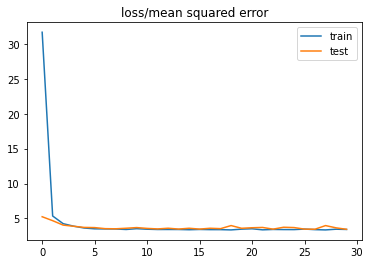

Train: 3.302, Test: 3.435
RMSE is  1.8533929739135948


In [55]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

n_cols = X_train_svd.shape[1]
input_shape = (n_cols, )
model = Sequential()
model.add(Dense(300, activation='relu', input_shape = input_shape))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()




model.compile(optimizer = 'adam', loss = 'mse')


#model.fit(X_train, y_train,  validation_split = .3, epochs = 30, batch_size=100,verbose=1,callbacks = [early_stopping_monitor])
history = model.fit(X_train_svd, y_train, validation_data = (X_test_svd, y_test), epochs = 30, batch_size=100,verbose=1)
y_pred= model.predict(X_test_svd)
# evaluate the model
train_mse = model.evaluate(X_train_svd, y_train, verbose=0)
test_mse = model.evaluate(X_test_svd, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is ', rmse)
plt.title('loss/mean squared error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
print('RMSE is ', rmse)


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 300)               1800      
_________________________________________________________________
dense_161 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_162 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_163 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 301       
Total params: 273,001
Trainable params: 273,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
29/29 [==============================] - 2s 29ms/step - loss: 65.8498 - val_loss: 6.9264
Epoch 2/30
29

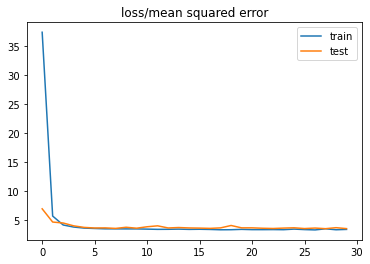

Train: 3.224, Test: 3.517
RMSE is  1.8753254248571232


In [57]:
from sklearn.decomposition import PCA

svd = PCA(n_components=5)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

n_cols = X_train_svd.shape[1]
input_shape = (n_cols, )
model = Sequential()
model.add(Dense(300, activation='relu', input_shape = input_shape))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()




model.compile(optimizer = 'adam', loss = 'mse')


#model.fit(X_train, y_train,  validation_split = .3, epochs = 30, batch_size=100,verbose=1,callbacks = [early_stopping_monitor])
history = model.fit(X_train_svd, y_train, validation_data = (X_test_svd, y_test), epochs = 30, batch_size=100,verbose=1)

y_pred= model.predict(X_test_svd)
# evaluate the model
train_mse = model.evaluate(X_train_svd, y_train, verbose=0)
test_mse = model.evaluate(X_test_svd, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is ', rmse)
plt.title('loss/mean squared error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
print('RMSE is ', rmse)


C:\Users\weird\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\weird\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 300)               1800      
_________________________________________________________________
dense_166 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_167 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_168 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 301       
Total params: 273,001
Trainable params: 273,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
29/29 [==============================] - 2s 33ms/step - loss: 72.0740 - val_loss: 9.1547
Epoch 2/30
29

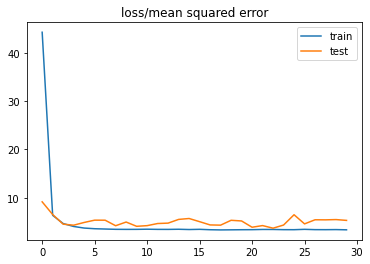

Train: 3.427, Test: 5.312
RMSE is  2.3048590927465584


In [58]:
#from sklearn.decomposition import NMF
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# svd = LDA(n_components=5)
svd = NMF(n_components = 5,  max_iter=7500)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

n_cols = X_train_svd.shape[1]
input_shape = (n_cols, )
model = Sequential()
model.add(Dense(300, activation='relu', input_shape = input_shape))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()




model.compile(optimizer = 'adam', loss = 'mse')


#model.fit(X_train, y_train,  validation_split = .3, epochs = 30, batch_size=100,verbose=1,callbacks = [early_stopping_monitor])
history = model.fit(X_train_svd, y_train, validation_data = (X_test_svd, y_test), epochs = 30, batch_size=100,verbose=1)

y_pred= model.predict(X_test_svd)
# evaluate the model
train_mse = model.evaluate(X_train_svd, y_train, verbose=0)
test_mse = model.evaluate(X_test_svd, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is ', rmse)
plt.title('loss/mean squared error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
print('RMSE is ', rmse)


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 300)               1800      
_________________________________________________________________
dense_171 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_172 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_173 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 301       
Total params: 273,001
Trainable params: 273,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
29/29 [==============================] - 3s 36ms/step - loss: 67.5357 - val_loss: 12.7625
Epoch 2/30
2

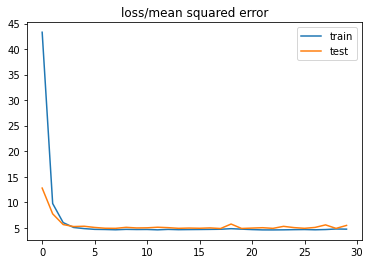

Train: 4.734, Test: 5.445
RMSE is  2.333422617105636


In [59]:
#from sklearn.decomposition import NMF
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# svd = LDA(n_components=5)
from sklearn.manifold import Isomap

svd = Isomap(n_components = 5)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

n_cols = X_train_svd.shape[1]
input_shape = (n_cols, )
model = Sequential()
model.add(Dense(300, activation='relu', input_shape = input_shape))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()




model.compile(optimizer = 'adam', loss = 'mse')


#model.fit(X_train, y_train,  validation_split = .3, epochs = 30, batch_size=100,verbose=1,callbacks = [early_stopping_monitor])
history = model.fit(X_train_svd, y_train, validation_data = (X_test_svd, y_test), epochs = 30, batch_size=100,verbose=1)

y_pred= model.predict(X_test_svd)
# evaluate the model
train_mse = model.evaluate(X_train_svd, y_train, verbose=0)
test_mse = model.evaluate(X_test_svd, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is ', rmse)
plt.title('loss/mean squared error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
print('RMSE is ', rmse)


Write a function that will indicate if an inputted IPv4 address is accurate or not.
IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated
by periods.

Input 1:

2.33.245.5

Output 1:

True

Input 2:

12.345.67.89

Output 2:

False

In [101]:

def validate(address):
  #  address = str(address)
    print(address)
    chunks = address.split('.')
    for x in chunks:
        if int(x)<0:
            return False
        if int(x)>255:
            return False
        if len(chunks) != 4:
            return False
        else:
            continue

    return True

In [102]:
validate('2.33.245.5')

2.33.245.5


True

In [107]:
validate('12.345.67.89')

12.345.67.89


False

In [104]:
validate('1321316546545')

1321316546545


False

In [108]:
validate('12.111.255.89')

12.111.255.89


True

In [109]:
validate('-12.111.255.89')

-12.111.255.89


False